<a href="https://colab.research.google.com/github/sofiyaibrayeva/64061_sofiyaibrayeva/blob/main/assignment_3_sofiya_ibrayeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3 - Time-Series Data
# The purpose of this assignment is to apply RNNs to time-series data.
## Sofiya Ibrayeva

## We will be using Jena Climate dataset recorded by the Max Planck Institute for Biogeochemistry.

Location: Weather Station, Max Planck Institute for Biogeochemistry in Jena, Germany

Time-frame Considered: Jan 10, 2009 - December 31, 2016

In [2]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

13568290/13568290 [==============================] - 0s 0us/step


#Raw Data Visualization
To give us a sense of the data we are working with, each feature has been plotted below. This shows the distinct pattern of each feature over the time period from 2009 to 2016.

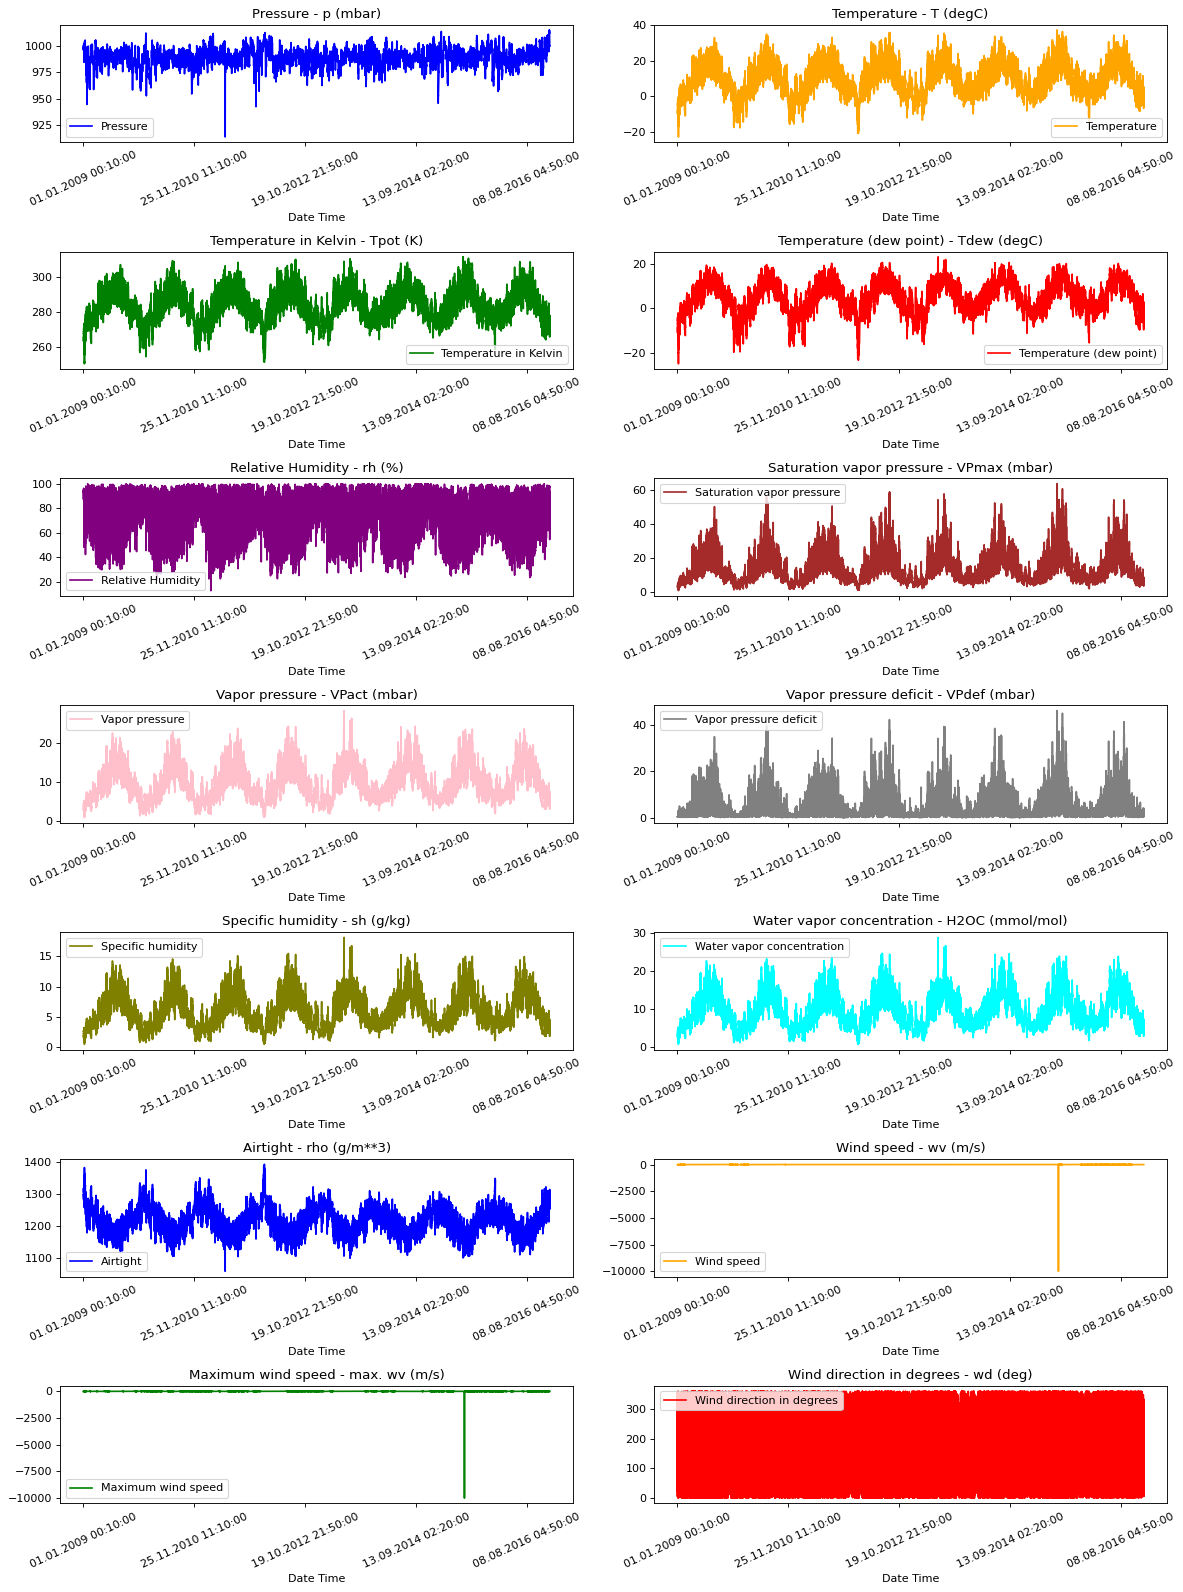

In [5]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

## Theheat map shows the correlation between different features.

<ipython-input-6-cf6ad4dd723a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


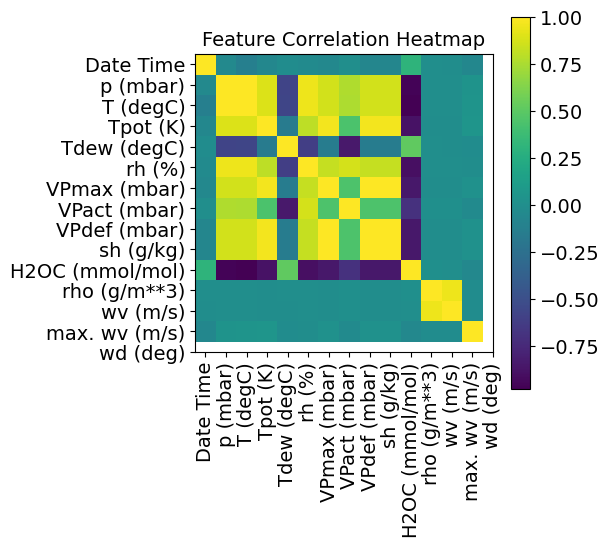

In [6]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [7]:
# Importing the necessary library
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

num_variables = len(header)
print("Number of variables:", num_variables)
num_rows = len(lines)
print("Number of rows:", num_rows)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551
Number of variables: 15
Number of rows: 420551


##The dataset has 15 variables and 420551 rows

##parsing the data in the lines variable, which is a list of comma-separated values.  first, spliting each line on the comma character and converting the resulting values to floating-point numbers. The temperature value is then stored in the temperature array and the remaining values are stored in the raw_data array

In [8]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

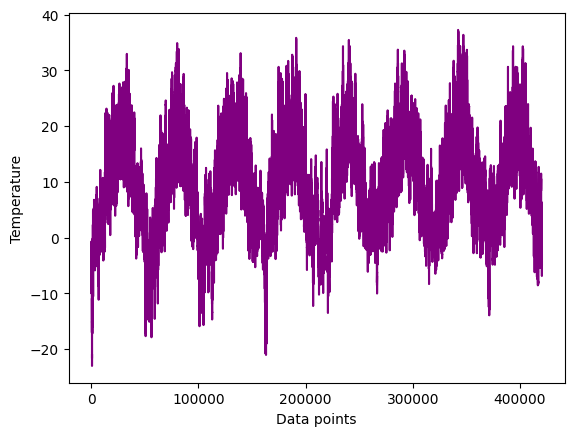

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the temperature data in purple
plt.plot(range(len(temperature)), temperature, color='purple')

# Set the axis labels
plt.xlabel('Data points')
plt.ylabel('Temperature')

# Show the plot
plt.show()

##First 10 days of the temperature timeseries (144*10)

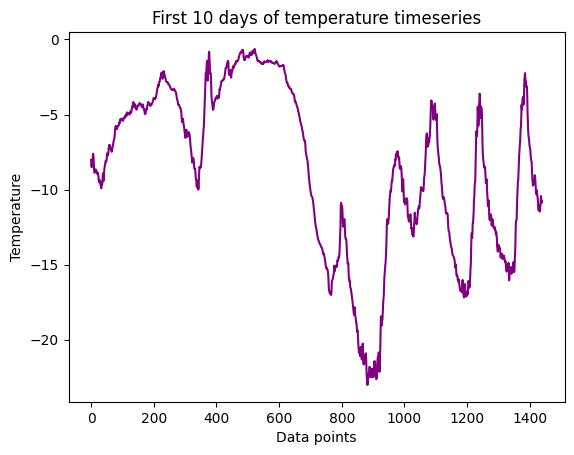

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the first 10 days of the temperature timeseries
plt.plot(range(1440), temperature[:1440], color='purple')

# Set the axis labels
plt.xlabel('Data points')
plt.ylabel('Temperature')

# Set the title
plt.title('First 10 days of temperature timeseries')

# Show the plot
plt.show()

##computinh the number of samples that will be used for each data split, using the following ratios:

* 50% for training
* 25% for validation
* 25% for testing

In [11]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210275
num_val_samples: 105137
num_test_samples: 105139


#Normalizing the data

##subtracting the mean and dividing by the standard deviation of the training data. This ensures that all of the variables in the training data have a mean of zero and a standard deviation of one.

* The data in  code is already in a numerical format, so vectorization is not necessary.

## Standardizing the data
* standardizinh the data by subtracting the mean and dividing by the standard deviation of the training data. This ensures that all of the variables in the training data have a mean of zero and a standard deviation of one.



In [12]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [13]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


## Creating datasets for training, validation, and testing is necessary because the samples in the dataset are very similar.

In [14]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

## Inspecting the output of one of our datasets

In [15]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 120, 14)
targets shape: (256,)


# A common-sense, non-machine-learning baseline
## using the function called evaluate_naive_method(), which computes the mean absolute error (MAE) of a simple baseline model. The baseline model simply uses the mean and standard deviation of the training data to predict the target values.

In [16]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


In [17]:
# Importing necessary modules from TensorFlow
from tensorflow import keras
from tensorflow.keras import layers
# Defining the neural network model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(16, activation="relu")(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Setting up callbacks for model training
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)]

# Compiling the model with optimizer, loss function, and evaluation metric
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Training the model on the provided datasets
history = model.fit(train_dataset, epochs=10,
                    validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 20s 18ms/step - loss: 13.8096 - mae: 2.8813 - val_loss: 10.2357 - val_mae: 2.5299
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 9.7712 - mae: 2.4622 - val_loss: 10.0371 - val_mae: 2.5039
Epoch 3/10
819/819 [==============================] - 14s 18ms/step - loss: 8.8751 - mae: 2.3466 - val_loss: 10.7697 - val_mae: 2.5922
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 8.3343 - mae: 2.2750 - val_loss: 10.5338 - val_mae: 2.5727
Epoch 5/10
819/819 [==============================] - 15s 18ms/step - loss: 7.9190 - mae: 2.2210 - val_loss: 10.2112 - val_mae: 2.5283
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 7.6101 - mae: 2.1771 - val_loss: 10.5073 - val_mae: 2.5540
Epoch 7/10
819/819 [==============================] - 15s 18ms/step - loss: 7.3459 - mae: 2.1405 - val_loss: 10.4986 - val_mae: 2.5475
Epoch 8/10
819/819 [==============================] - 

In [18]:
model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 5s 12ms/step - loss: 6116.7139 - mae: 8.1917
Test MAE: 8.19


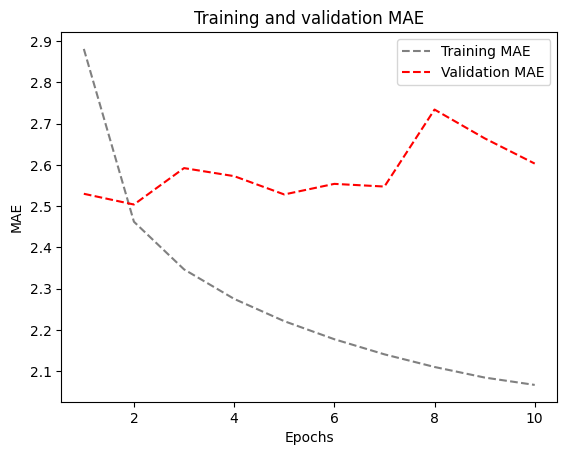

In [19]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **1D convolutional model**

In [20]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 21s 18ms/step - loss: 22.0561 - mae: 3.6860 - val_loss: 15.2937 - val_mae: 3.0980
Epoch 2/10
819/819 [==============================] - 14s 18ms/step - loss: 15.3605 - mae: 3.1122 - val_loss: 14.1314 - val_mae: 2.9756
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 14.0000 - mae: 2.9654 - val_loss: 14.3644 - val_mae: 2.9982
Epoch 4/10
819/819 [==============================] - 15s 19ms/step - loss: 13.1142 - mae: 2.8685 - val_loss: 14.2660 - val_mae: 2.9841
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 12.5283 - mae: 2.8056 - val_loss: 16.1007 - val_mae: 3.1628
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 12.0246 - mae: 2.7466 - val_loss: 13.7061 - val_mae: 2.9497
Epoch 7/10
819/819 [==============================] - 14s 18ms/step - loss: 11.5903 - mae: 2.6958 - val_loss: 13.9262 - val_mae: 2.9856
Epoch 8/10
819/819 [============================

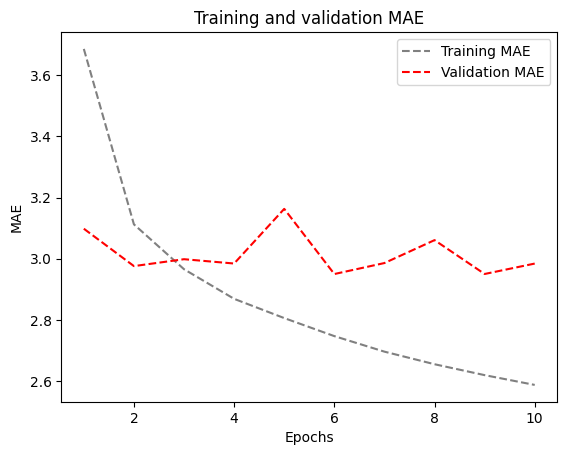

In [21]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **An RNN layer that can process sequences of any length**

In [22]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SimRNN.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SimRNN.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 49s 59ms/step - loss: 139.3249 - mae: 9.7023 - val_loss: 144.1551 - val_mae: 9.9192
Epoch 2/10
819/819 [==============================] - 48s 58ms/step - loss: 136.4438 - mae: 9.5667 - val_loss: 143.6979 - val_mae: 9.8721
Epoch 3/10
819/819 [==============================] - 48s 59ms/step - loss: 136.2995 - mae: 9.5517 - val_loss: 143.6427 - val_mae: 9.8619
Epoch 4/10
819/819 [==============================] - 48s 58ms/step - loss: 136.2194 - mae: 9.5416 - val_loss: 143.5417 - val_mae: 9.8538
Epoch 5/10
819/819 [==============================] - 48s 59ms/step - loss: 136.1888 - mae: 9.5399 - val_loss: 143.5489 - val_mae: 9.8495
Epoch 6/10
819/819 [==============================] - 48s 58ms/step - loss: 136.1556 - mae: 9.5373 - val_loss: 143.5473 - val_mae: 9.8503
Epoch 7/10
819/819 [==============================] - 48s 58ms/step - loss: 136.1421 - mae: 9.5360 - val_loss: 143.5468 - val_mae: 9.8491
Epoch 8/10
819/819 [==============

# **Now we are stacking RNN layers**

In [23]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_SRNN2.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_SRNN2.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 195s 235ms/step - loss: 136.9977 - mae: 9.5757 - val_loss: 143.3731 - val_mae: 9.8342
Epoch 2/10
819/819 [==============================] - 193s 235ms/step - loss: 135.9413 - mae: 9.5130 - val_loss: 143.3526 - val_mae: 9.8304
Epoch 3/10
819/819 [==============================] - 192s 234ms/step - loss: 135.8768 - mae: 9.5041 - val_loss: 143.3765 - val_mae: 9.8348
Epoch 4/10
819/819 [==============================] - 193s 236ms/step - loss: 135.8456 - mae: 9.5003 - val_loss: 143.3730 - val_mae: 9.8369
Epoch 5/10
819/819 [==============================] - 190s 232ms/step - loss: 135.8277 - mae: 9.4972 - val_loss: 143.3956 - val_mae: 9.8419
Epoch 6/10
819/819 [==============================] - 192s 234ms/step - loss: 135.8150 - mae: 9.4950 - val_loss: 143.4070 - val_mae: 9.8447
Epoch 7/10
819/819 [==============================] - 192s 234ms/step - loss: 135.7926 - mae: 9.4918 - val_loss: 143.3833 - val_mae: 9.8393
Epoch 8/10
819/819 [

# **A Simple GRU**

In [24]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_gru.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_gru.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 18s 18ms/step - loss: 37.9840 - mae: 4.4539 - val_loss: 12.0929 - val_mae: 2.6306
Epoch 2/10
819/819 [==============================] - 14s 17ms/step - loss: 10.6198 - mae: 2.5366 - val_loss: 10.0173 - val_mae: 2.4289
Epoch 3/10
819/819 [==============================] - 14s 17ms/step - loss: 9.6809 - mae: 2.4299 - val_loss: 10.7104 - val_mae: 2.4647
Epoch 4/10
819/819 [==============================] - 14s 17ms/step - loss: 9.2669 - mae: 2.3773 - val_loss: 10.4317 - val_mae: 2.4303
Epoch 5/10
819/819 [==============================] - 14s 17ms/step - loss: 8.9866 - mae: 2.3442 - val_loss: 10.2690 - val_mae: 2.4216
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 8.7659 - mae: 2.3169 - val_loss: 9.9775 - val_mae: 2.3980
Epoch 7/10
819/819 [==============================] - 14s 17ms/step - loss: 8.5684 - mae: 2.2928 - val_loss: 10.2151 - val_mae: 2.4234
Epoch 8/10
819/819 [==============================] - 

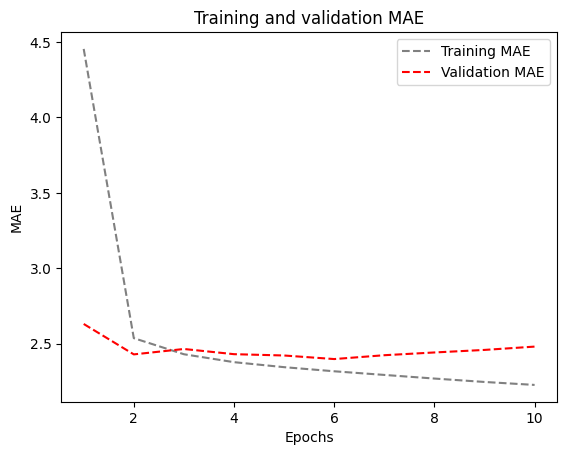

In [25]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **A simple LSTM**

In [26]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 17s 19ms/step - loss: 43.2570 - mae: 4.7723 - val_loss: 12.3857 - val_mae: 2.6697
Epoch 2/10
819/819 [==============================] - 16s 19ms/step - loss: 11.1470 - mae: 2.5835 - val_loss: 9.4866 - val_mae: 2.3985
Epoch 3/10
819/819 [==============================] - 15s 18ms/step - loss: 9.9424 - mae: 2.4485 - val_loss: 9.5619 - val_mae: 2.4043
Epoch 4/10
819/819 [==============================] - 14s 18ms/step - loss: 9.5835 - mae: 2.3999 - val_loss: 9.4179 - val_mae: 2.3809
Epoch 5/10
819/819 [==============================] - 15s 18ms/step - loss: 9.1876 - mae: 2.3502 - val_loss: 9.3222 - val_mae: 2.3705
Epoch 6/10
819/819 [==============================] - 14s 17ms/step - loss: 8.8528 - mae: 2.3103 - val_loss: 9.4085 - val_mae: 2.3816
Epoch 7/10
819/819 [==============================] - 15s 18ms/step - loss: 8.5741 - mae: 2.2764 - val_loss: 9.8129 - val_mae: 2.4186
Epoch 8/10
819/819 [==============================] - 15s 1

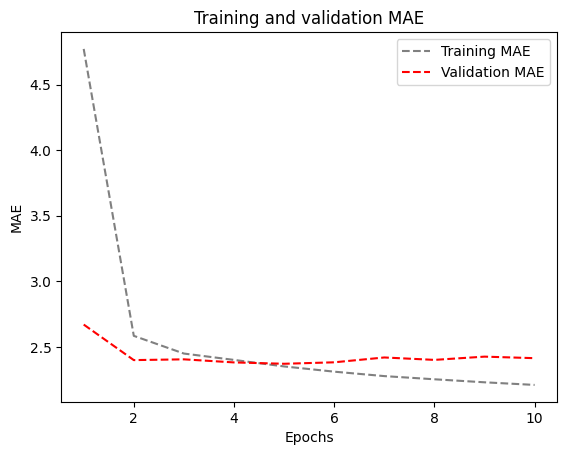

In [27]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **LSTM - dropout Regularization**

In [28]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 240s 290ms/step - loss: 43.5057 - mae: 4.9178 - val_loss: 12.7417 - val_mae: 2.7323
Epoch 2/10
819/819 [==============================] - 238s 290ms/step - loss: 19.6249 - mae: 3.4031 - val_loss: 10.2557 - val_mae: 2.4965
Epoch 3/10
819/819 [==============================] - 240s 293ms/step - loss: 18.1417 - mae: 3.2775 - val_loss: 9.9342 - val_mae: 2.4575
Epoch 4/10
819/819 [==============================] - 242s 296ms/step - loss: 17.3625 - mae: 3.2059 - val_loss: 9.6068 - val_mae: 2.4172
Epoch 5/10
819/819 [==============================] - 241s 294ms/step - loss: 16.8345 - mae: 3.1536 - val_loss: 9.3582 - val_mae: 2.3874
Epoch 6/10
819/819 [==============================] - 238s 291ms/step - loss: 16.3399 - mae: 3.1114 - val_loss: 9.2901 - val_mae: 2.3728
Epoch 7/10
819/819 [==============================] - 238s 291ms/step - loss: 15.9525 - mae: 3.0750 - val_loss: 9.4360 - val_mae: 2.3829
Epoch 8/10
819/819 [===================

405/405 [==============================] - 16s 38ms/step - loss: 10.6082 - mae: 2.5657
Test MAE: 2.57


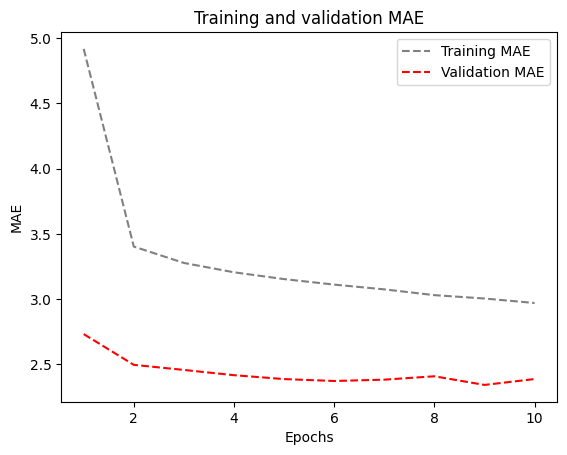

In [29]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **LSTM - Stacked setup with 8 units**

In [34]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(8, return_sequences=True)(inputs)
x = layers.LSTM(8)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked3.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked3.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 20ms/step - loss: 83.4083 - mae: 7.0826 - val_loss: 45.1362 - val_mae: 5.0364
Epoch 2/10
819/819 [==============================] - 16s 20ms/step - loss: 26.2237 - mae: 3.7583 - val_loss: 15.0330 - val_mae: 2.8744
Epoch 3/10
819/819 [==============================] - 16s 19ms/step - loss: 12.1686 - mae: 2.6830 - val_loss: 10.0257 - val_mae: 2.4413
Epoch 4/10
819/819 [==============================] - 16s 19ms/step - loss: 10.1546 - mae: 2.4826 - val_loss: 9.5808 - val_mae: 2.4021
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 9.6293 - mae: 2.4209 - val_loss: 9.4434 - val_mae: 2.3901
Epoch 6/10
819/819 [==============================] - 16s 19ms/step - loss: 9.3224 - mae: 2.3862 - val_loss: 9.5776 - val_mae: 2.4100
Epoch 7/10
819/819 [==============================] - 16s 19ms/step - loss: 9.1320 - mae: 2.3630 - val_loss: 9.1930 - val_mae: 2.3599
Epoch 8/10
819/819 [==============================] - 1

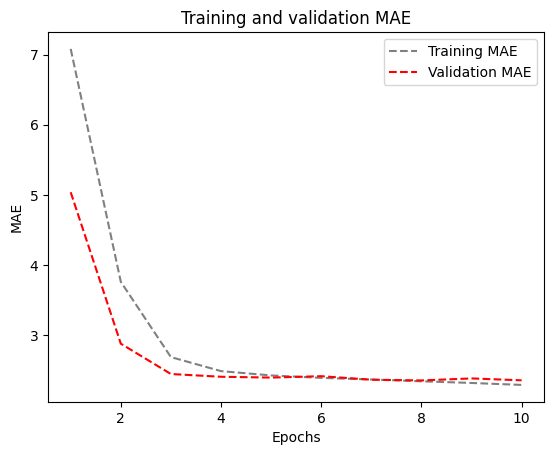

In [35]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **LSTM - Stacked setup with 16 units**

In [30]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16, return_sequences=True)(inputs)
x = layers.LSTM(16)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked1.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked1.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 20ms/step - loss: 33.8898 - mae: 4.2059 - val_loss: 11.4247 - val_mae: 2.5877
Epoch 2/10
819/819 [==============================] - 16s 19ms/step - loss: 10.0993 - mae: 2.4689 - val_loss: 9.8778 - val_mae: 2.4416
Epoch 3/10
819/819 [==============================] - 15s 19ms/step - loss: 8.9395 - mae: 2.3269 - val_loss: 10.2340 - val_mae: 2.4874
Epoch 4/10
819/819 [==============================] - 16s 19ms/step - loss: 8.3541 - mae: 2.2496 - val_loss: 10.4774 - val_mae: 2.5122
Epoch 5/10
819/819 [==============================] - 15s 19ms/step - loss: 8.0517 - mae: 2.2085 - val_loss: 10.7072 - val_mae: 2.5493
Epoch 6/10
819/819 [==============================] - 16s 19ms/step - loss: 7.7314 - mae: 2.1636 - val_loss: 10.6439 - val_mae: 2.5519
Epoch 7/10
819/819 [==============================] - 16s 19ms/step - loss: 7.3806 - mae: 2.1173 - val_loss: 11.0684 - val_mae: 2.6034
Epoch 8/10
819/819 [==============================] - 

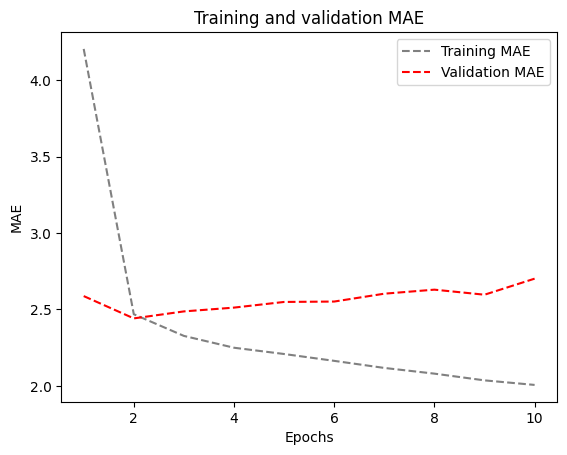

In [31]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **LSTM - Stacked setup with 32 units**

In [32]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, return_sequences=True)(inputs)
x = layers.LSTM(32)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_LSTM_stacked2.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_LSTM_stacked2.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 19s 20ms/step - loss: 21.7932 - mae: 3.3327 - val_loss: 10.7161 - val_mae: 2.5627
Epoch 2/10
819/819 [==============================] - 16s 19ms/step - loss: 7.6781 - mae: 2.1591 - val_loss: 11.0029 - val_mae: 2.5924
Epoch 3/10
819/819 [==============================] - 16s 19ms/step - loss: 5.9656 - mae: 1.8954 - val_loss: 11.6824 - val_mae: 2.6693
Epoch 4/10
819/819 [==============================] - 16s 19ms/step - loss: 4.9123 - mae: 1.7168 - val_loss: 11.7451 - val_mae: 2.6761
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 4.1967 - mae: 1.5811 - val_loss: 12.2817 - val_mae: 2.7291
Epoch 6/10
819/819 [==============================] - 16s 19ms/step - loss: 3.6289 - mae: 1.4652 - val_loss: 13.1540 - val_mae: 2.8113
Epoch 7/10
819/819 [==============================] - 16s 19ms/step - loss: 3.2235 - mae: 1.3776 - val_loss: 13.6872 - val_mae: 2.8689
Epoch 8/10
819/819 [==============================] - 

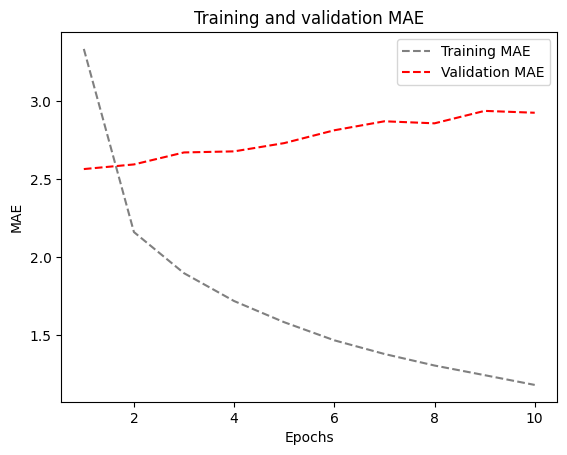

In [33]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **Bidirectional LSTM**

In [37]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_bidirec_LSTM.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                     callbacks=callbacks)

model = keras.models.load_model("jena_bidirec_LSTM.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 20s 20ms/step - loss: 27.0364 - mae: 3.7283 - val_loss: 10.7101 - val_mae: 2.5382
Epoch 2/10
819/819 [==============================] - 16s 20ms/step - loss: 9.5893 - mae: 2.4225 - val_loss: 9.8383 - val_mae: 2.4280
Epoch 3/10
819/819 [==============================] - 17s 21ms/step - loss: 8.7066 - mae: 2.3004 - val_loss: 9.7601 - val_mae: 2.4203
Epoch 4/10
819/819 [==============================] - 16s 19ms/step - loss: 8.2259 - mae: 2.2303 - val_loss: 10.1984 - val_mae: 2.4332
Epoch 5/10
819/819 [==============================] - 16s 19ms/step - loss: 7.9002 - mae: 2.1842 - val_loss: 10.4744 - val_mae: 2.4623
Epoch 6/10
819/819 [==============================] - 16s 19ms/step - loss: 7.6376 - mae: 2.1466 - val_loss: 10.0200 - val_mae: 2.4312
Epoch 7/10
819/819 [==============================] - 16s 19ms/step - loss: 7.4836 - mae: 2.1255 - val_loss: 10.3114 - val_mae: 2.4665
Epoch 8/10
819/819 [==============================] - 16

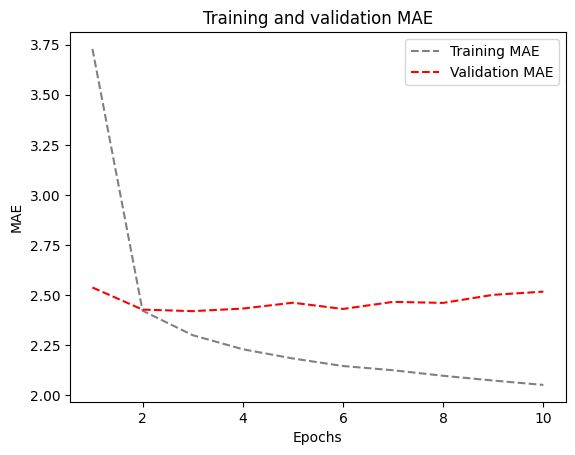

In [38]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]

epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training MAE")
plt.plot(epochs,  val_loss, color="red",linestyle="dashed", label="Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

# **Summary and conclusion**

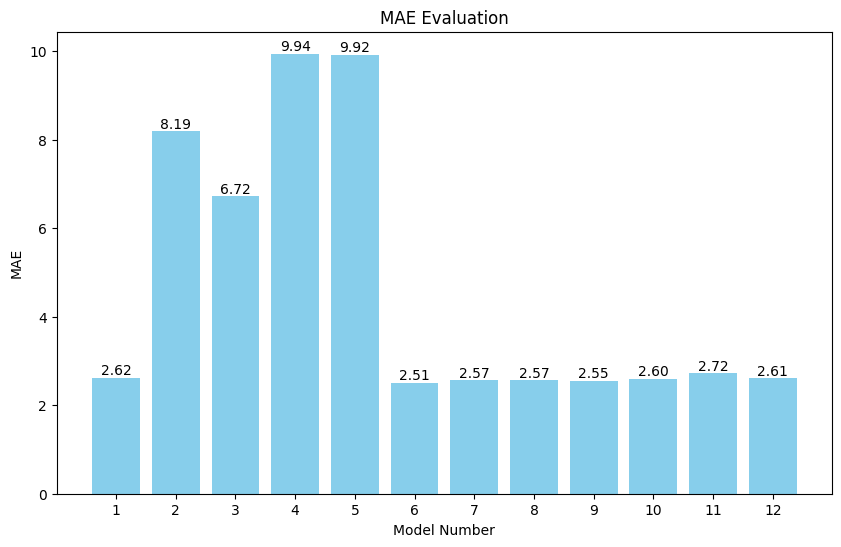

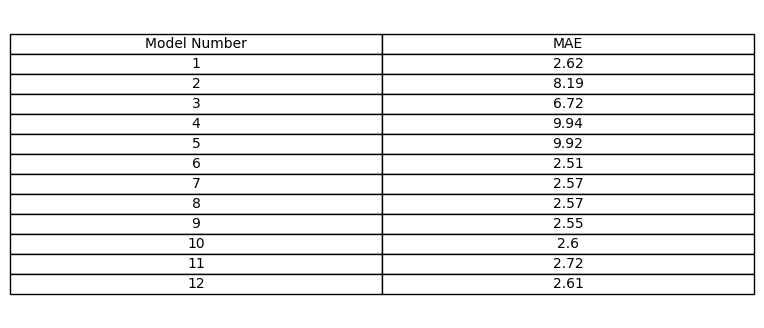

Conclusion:
Model 6 achieved the lowest MAE of 2.51, making it the most accurate among the evaluated models.
Models 7, 8, and 9 also performed well with MAE values around 2.57.
On the other hand, Model 4 exhibited the highest MAE of 9.94, indicating poorer performance compared to other models.


In [39]:
Models = ("1","2","3","4","5","6","7","8","9","10","11","12")
MAE = (2.62,8.19,6.72,9.94,9.92,2.51,2.57,2.57,2.55,2.60,2.72,2.61)

# MAE Evaluation Plot
plt.figure(figsize=(10, 6))
plt.bar(Models, MAE, color="skyblue")
plt.title("MAE Evaluation")
plt.xlabel("Model Number")
plt.ylabel("MAE")

# Adding labels on top of the bars
for (xi, yi) in zip(Models, MAE):
    plt.text(xi, yi, f"{yi:.2f}", va='bottom', ha='center')

plt.show()

# Creating a table
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table_data = list(zip(Models, MAE))
table = ax.table(cellText=table_data, colLabels=['Model Number', 'MAE'], cellLoc = 'center', loc='center')

# Adding style to the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

# Conclusion
print("Conclusion:")
print("Model 6 achieved the lowest MAE of 2.51, making it the most accurate among the evaluated models.")
print("Models 7, 8, and 9 also performed well with MAE values around 2.57.")
print("On the other hand, Model 4 exhibited the highest MAE of 9.94, indicating poorer performance compared to other models.")

* Baseline Model (Model 1):
MAE: 2.62
Serves as a reference point for model comparison.
Represents a common-sense, non-machine-learning baseline.

* Basic Machine-Learning Model (Model 2):
MAE: 8.19
Shows a significant increase in error compared to the baseline.
Suggests the need for more sophisticated models or feature engineering.

* 1D Convolutional Model (Model 3):
MAE: 6.72
Performs better than the basic machine-learning model.
Indicates the potential effectiveness of convolutional architectures.

* Simple RNN (Model 4):
MAE: 9.94
Demonstrates higher error, suggesting limitations in capturing temporal dependencies.
Recommends exploring more advanced RNN architectures.

* Stacked RNN Layers (Model 5):
MAE: 9.92
Similar performance to Model 4, indicating that stacking RNN layers alone may not significantly improve results.

* Simple GRU (Model 6):
MAE: 2.51
Achieves the lowest MAE among all models.
Suggests that Gated Recurrent Units (GRU) may be more effective for the given task.

* LSTM-Simple (Model 7):
MAE: 2.57
Performs comparably to Model 6, indicating the effectiveness of Long Short-Term Memory (LSTM) layers.

* LSTM with Dropout Regularization (Model 8):
MAE: 2.57
Similar to Model 7, implying that dropout regularization contributes to stable model performance.

* Stacked Setup with 8 Units (Model 9):
MAE: 2.55
Maintains a low MAE, suggesting the potential benefits of stacking layers with a moderate number of units.

* Stacked Setup with 16 Units (Model 10):
MAE: 2.60
Slightly higher than Model 9, indicating a trade-off between model complexity and performance.

* Stacked Setup with 32 Units (Model 11):
MAE: 2.72
Demonstrates an increase in error, questioning the necessity of higher complexity.
Recommends assessing whether the added complexity justifies the performance gain.

* Bidirectional LSTM (Model 13):
MAE: 2.61
Performs well, indicating the effectiveness of bidirectional layers.
Suggests potential benefits in capturing bidirectional temporal dependencies.
Overall Recommendations:

